In [1]:
from QAOA import QAOArunner
from MaxCutProblem import MaxCutProblem
import params
from rustworkx.visualization import mpl_draw as draw_graph
from load_data import load_graph_from_csv

File: graph5c.g6.txt, Asymmetric: 10,Symmetric: 4
File: graph6c.g6.txt, Asymmetric: 10,Symmetric: 10
File: graph7c.g6.txt, Asymmetric: 10,Symmetric: 10
File: graph8c.g6.txt, Asymmetric: 10,Symmetric: 10
File: graph9c.g6.txt, Asymmetric: 10,Symmetric: 10


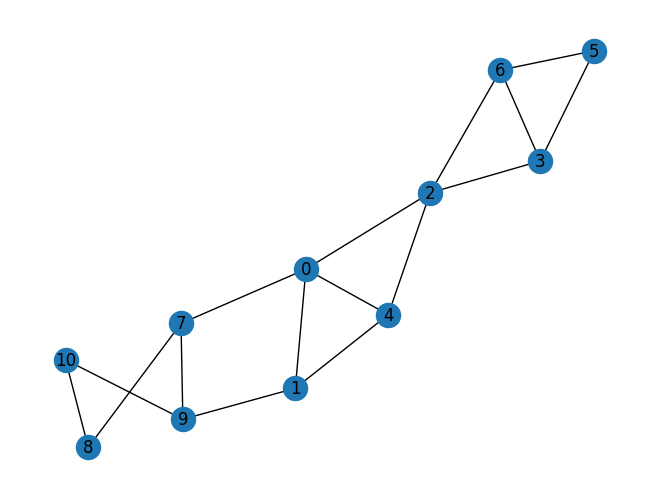

In [9]:
problem = MaxCutProblem()
graph = problem.get_graph(6, create_random=True,random_weights=False)
graph = load_graph_from_csv('data/11_nodes_links_scand.csv')
draw_graph(graph, with_labels=True)

In [ ]:
quantum = QAOArunner(graph=graph, 
                     simulation=True,
                     param_initialization= 'gaussian',
                     qaoa_variant='vanilla', 
                     optimizer='COBYLA',
                     warm_start=False,
                     restrictions = False,
                     test=True
                     )

quantum.build_circuit()

quantum.run()
print(quantum.solution)
#quantum.draw_circuit()
#TODO: account for random weigts?

Cost hamiltonian SparsePauliOp(['IIIIIIIIIZZ', 'IIIIIIIIZIZ', 'IIIIIIZIIIZ', 'IIIZIIIIIIZ', 'IIIIIIZIIZI', 'IZIIIIIIIZI', 'IIIIIIIZZII', 'IIIIIIZIZII', 'IIIIZIIIZII', 'IIIIIZIZIII', 'IIIIZIIZIII', 'IIIIZZIIIII', 'IIZZIIIIIII', 'IZIZIIIIIII', 'ZIZIIIIIIII', 'ZZIIIIIIIII'],
              coeffs=[0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j,
 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j])
Parameters:  ParameterView([ParameterVectorElement(β[0]), ParameterVectorElement(β[1]), ParameterVectorElement(γ[0]), ParameterVectorElement(γ[1])])
Ansatz type: <class 'qiskit.circuit.library.n_local.qaoa_ansatz.QAOAAnsatz'>
Candidate circuit type: <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'>
 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -2.208791208791209
       x: [-1.187e+00  4.662e+00 -4.727e-01  2.832e+00]
    nfev: 33
   maxcv: 0.0
{2022: 1, 924: 20, 753: 11, 742: 13, 170: 4, 1190: 93, 881: 57, 713

In [4]:
import itertools

iterables = [params.supported_qaoa_variants, params.supported_param_inits]

settings = []
for t in itertools.product(*iterables):
    settings.append(t)
for params in settings:
    print('Params:', params)
    qaoa = QAOArunner(graph, simulation=True, param_initialization=params[1],qaoa_variant=params[0])
    qaoa.build_circuit()
    qaoa.run()

Params: ('vanilla', 'uniform')
You are running on the local simulator:  fake_brisbane
You are running on the local simulator:  fake_brisbane
Cost hamiltonian SparsePauliOp(['IIIIZZ', 'IIIZIZ', 'IZIIIZ', 'ZIIIIZ', 'IIZIZI', 'IZIZII'],
              coeffs=[0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j])
Parameters:  ParameterView([ParameterVectorElement(β[0]), ParameterVectorElement(β[1]), ParameterVectorElement(γ[0]), ParameterVectorElement(γ[1])])
Ansatz type: <class 'qiskit.circuit.library.n_local.qaoa_ansatz.QAOAAnsatz'>
Candidate circuit type: <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'>


KeyboardInterrupt: 

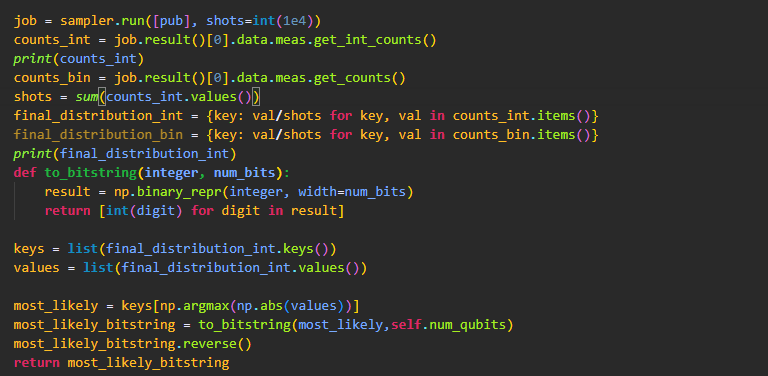

In [32]:
#the data given here is the "job" from the picture above
data = qaoa.get_data_structures()


ValueError: The number of values (0) does not match the number of parameters (4) for the circuit. Note that if you want to run a single pub, you need to wrap it with `[]` like `sampler.run([(circuit, param_values)])` instead of `sampler.run((circuit, param_values))`.

In [38]:
from solver import Solver


solver = Solver(graph, restrictions=False)
quantum.compare_solutions(solver.solve())

Result quantum [1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0] Objective value:  14
Result input (classical) [0, 1.0, 1.0, 0, 0, 1.0, 0, 1.0, 0, 0, 1.0] Objective Value:  14.0
Same solution True
Same objective function value:  True


In [39]:
quantum.get_prob_distribution()

{1255: 16, 1506: 10, 218: 18, 1581: 13, 825: 70, 1187: 15, 1166: 77, 813: 28, 346: 12, 225: 3, 804: 20, 678: 15, 1079: 1, 511: 1, 1243: 13, 1002: 1, 866: 5, 1675: 2, 1778: 4, 1833: 8, 848: 17, 1752: 26, 195: 7, 525: 20, 713: 12, 1190: 94, 1067: 11, 851: 3, 889: 18, 974: 4, 839: 15, 1189: 17, 692: 30, 1266: 48, 1274: 14, 1394: 12, 1812: 3, 857: 97, 823: 5, 881: 51, 841: 54, 1141: 3, 1242: 62, 467: 3, 865: 32, 871: 16, 868: 3, 1177: 13, 171: 5, 342: 3, 1741: 3, 446: 16, 806: 38, 315: 9, 345: 11, 587: 13, 498: 27, 159: 2, 1651: 2, 1898: 1, 926: 7, 769: 6, 883: 7, 884: 19, 1849: 23, 996: 3, 166: 23, 820: 50, 532: 3, 240: 1, 1210: 41, 619: 3, 1248: 3, 696: 19, 1030: 7, 1776: 17, 1744: 7, 785: 9, 1738: 2, 742: 13, 1160: 1, 779: 10, 846: 11, 752: 23, 1270: 23, 774: 3, 431: 4, 186: 16, 817: 33, 1390: 2, 1198: 42, 294: 20, 1206: 47, 1861: 16, 1419: 4, 454: 31, 1716: 25, 1805: 8, 870: 18, 830: 9, 717: 3, 863: 2, 1350: 11, 1339: 4, 833: 17, 1451: 4, 793: 37, 1241: 55, 1369: 17, 1509: 2, 483: 8, 1

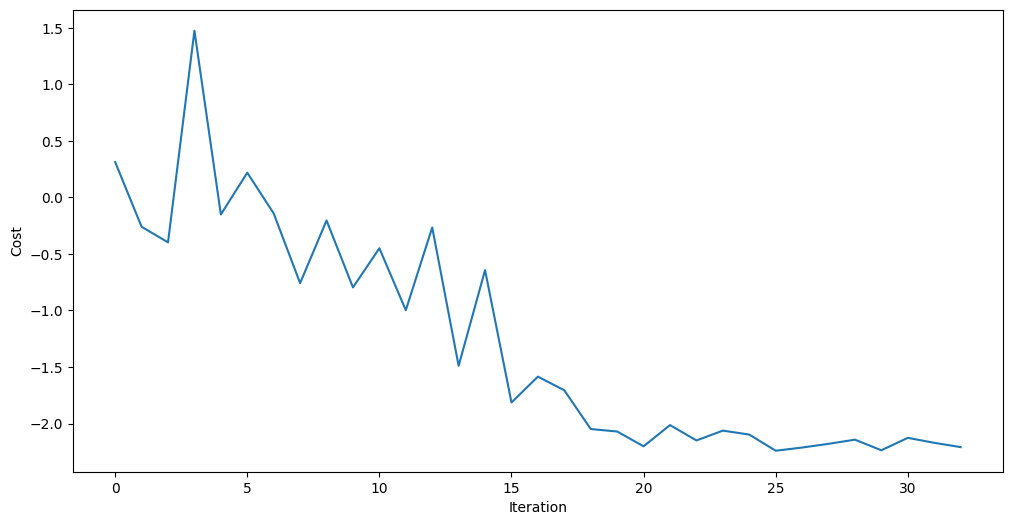

In [40]:
quantum.draw_objective_value()

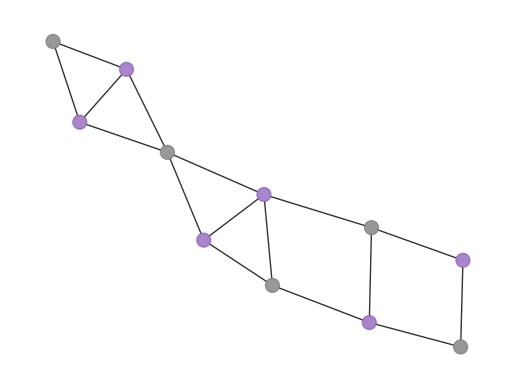

In [41]:
quantum.plot_result()

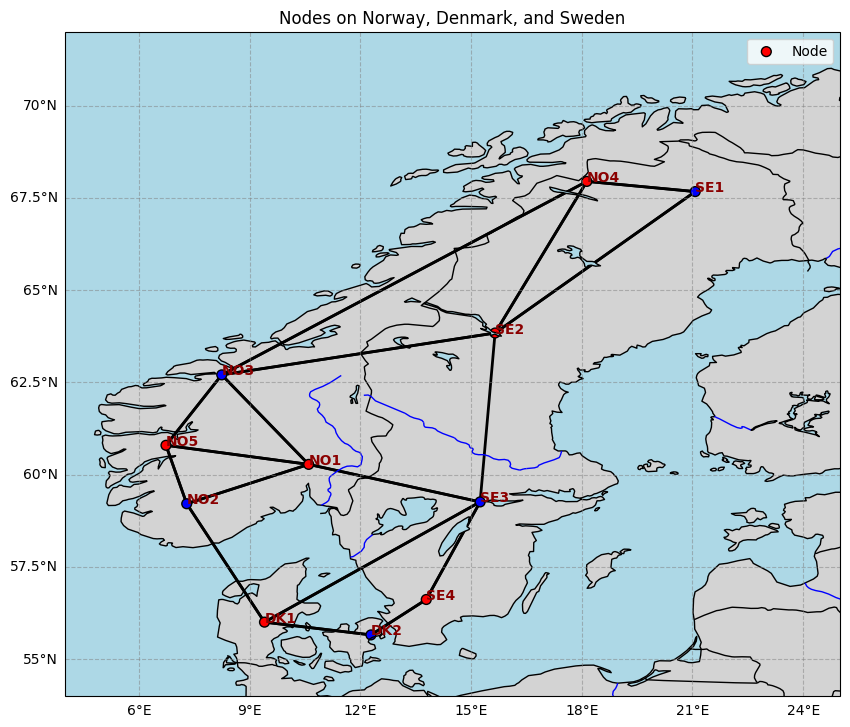

In [42]:
import csv

import numpy as np
import rustworkx as rx
from rustworkx import is_connected
from rustworkx.visualization import mpl_draw as draw_graph
import pandas as pd
import geopandas as gpd
import cartopy.feature as cfeature

import cartopy.crs as ccrs
import matplotlib.pyplot as plt

def load_edges_verbose(file_path):
    df = pd.read_csv(file_path,delimiter=';',index_col=0)
    result = [(row, col, 1) for (row, col), value in df.stack().items() if value == 1]
    return result


def draw_nodes_on_cartopy(file_path, bitstring=None):
    
    df = pd.read_csv(file_path, delimiter=';')
    edges = load_edges_verbose('data/11_nodes_links_scand.csv')
    
    # Rename the first column
    df.rename(columns={df.columns[0]: 'name'}, inplace=True)
    # Set up a GeoDataFrame
    gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['y'], df['x']))

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

    # Add map features
    ax.set_extent([4, 25, 54, 72], crs=ccrs.PlateCarree())  # Set the extent to cover Norway, Denmark, Sweden
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
    ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='black')
    ax.add_feature(cfeature.COASTLINE, edgecolor='black')
    ax.add_feature(cfeature.LAKES, facecolor='lightblue', edgecolor='black')
    ax.add_feature(cfeature.RIVERS, edgecolor='blue')
    gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
  
    # Plot nodes on the map
    
    
    for start_label, end_label, weight in edges:
        start_coords = (df[df['name']==start_label]['y'], df[df['name']==start_label]['x'])
        end_coords = (df[df['name']==end_label]['y'], df[df['name']==end_label]['x'])
        ax.plot(
            [start_coords[0], end_coords[0]],  # x-coordinates (longitudes)
            [start_coords[1], end_coords[1]],  # y-coordinates (latitudes)
            color='black', linewidth=1 + weight, transform=ccrs.PlateCarree(), zorder=1
        )
    if bitstring is not None:
        colors = ['red' if bit == 1 else 'blue' for bit in bitstring]
    else:
        colors = 'red'
    
    gdf.plot(ax=ax, color=colors, markersize=50, transform=ccrs.PlateCarree(), edgecolor='black', label='Node')

    for idx, row in gdf.iterrows():
        ax.text(row.geometry.x + 0.005, row.geometry.y, row['name'], transform=ccrs.PlateCarree(),
                ha='left', fontsize=10, color='darkred', fontweight='bold')

    
    plt.legend()
    plt.title("Nodes on Norway, Denmark, and Sweden")
    plt.show()
draw_nodes_on_cartopy('data/11_nodes_coords_scand.csv', bitstring=quantum.solution)



